In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
titanic=pd.read_csv("titanic_train.csv")

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Exploratory Data Analysis

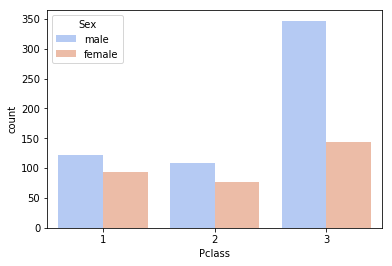

In [10]:
sns.countplot(x='Pclass',data=titanic,hue='Sex',palette='coolwarm')

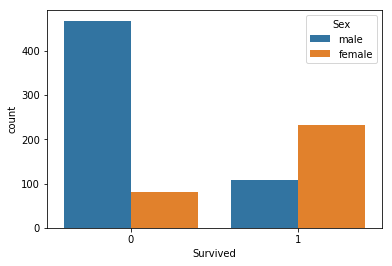

In [12]:
titanic.head()
sns.countplot(x='Survived',data=titanic,hue='Sex')

From the graph we can infer that most of the male lost their lives compared to female passengers

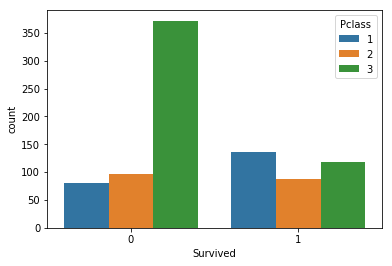

In [14]:
sns.countplot(x='Survived',data=titanic,hue='Pclass')

Passengers from the class 3 lost their life compared to 1 and 2 class

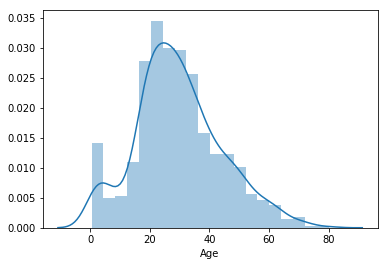

In [20]:
sns.distplot(titanic['Age'].dropna())

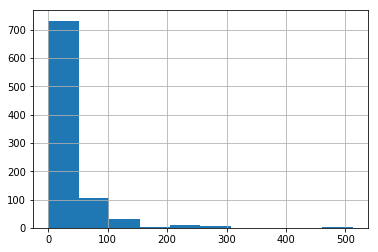

In [23]:
titanic['Fare'].hist()

In [27]:
import cufflinks as cf
cf.go_offline()

In [29]:
titanic['Fare'].iplot(kind='hist',bins=30,color='green')

In [31]:
titanic.head()
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        
        if Pclass==1:
            return 37
        if Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age
            

In [37]:
titanic['Age']=titanic[['Age','Pclass']].apply(impute_age,axis=1)

Check for the Null values in the dataset

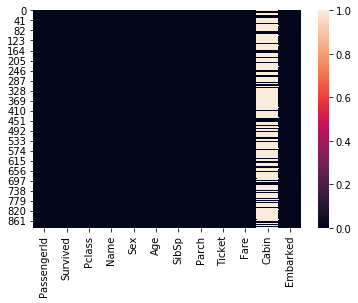

In [41]:
sns.heatmap(titanic.isnull())

Dropping the unuseful column from the dataset

In [46]:
titanic.drop('Cabin',axis=1,inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,24,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,37,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,24,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,37,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,24,0,0,373450,8.0500,S


Converting the categorical column into binary using pandas

In [47]:
sex=pd.get_dummies(titanic['Sex'],drop_first=True)
embark=pd.get_dummies(titanic['Embarked'],drop_first=True)

In [48]:
titanic.drop(['Name','Sex','Ticket','Embarked'],axis=1,inplace=True)

In [50]:
titanic=pd.concat([titanic,sex,embark],axis=1)

In [51]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,24,1,0,7.2500,1,0,1
1,2,1,1,37,1,0,71.2833,0,0,0
2,3,1,3,24,0,0,7.9250,0,0,1
3,4,1,1,37,1,0,53.1000,0,0,1
4,5,0,3,24,0,0,8.0500,1,0,1


In [52]:
from sklearn.model_selection import train_test_split

In [53]:
trainX,testX,trainY,testY=train_test_split(titanic.drop('Survived',axis=1),titanic['Survived'],test_size=0.4,random_state=101)

In [54]:
from sklearn.linear_model import LogisticRegression

In [56]:
logmodel=LogisticRegression()

In [58]:
logmodel.fit(trainX,trainY)

C:\Users\Akshay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [59]:
prediction=logmodel.predict(testX)

In [60]:
from sklearn.metrics import classification_report

In [61]:
print(classification_report(testY,prediction))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       207
           1       0.80      0.66      0.72       150

   micro avg       0.79      0.79      0.79       357
   macro avg       0.79      0.77      0.77       357
weighted avg       0.79      0.79      0.78       357

